In [12]:
%load_ext autoreload
%autoreload 2

import sys
import random

import pandas as pd
import matplotlib.pyplot as plt


sys.path.append("../..")
from src.data import DataPaths, open_numpy, label_to_string

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Generate the color maps 

#### Read in the kaggle images and the external HPAv18 images

In [6]:
kaggle_image_paths = list(DataPaths.TRAIN_COMBINED_IMAGES.glob("*"))
kaggle_labels = pd.read_csv(DataPaths.TRAIN_LABELS)
hpaV18_image_paths = list(DataPaths.TRAIN_COMBINED_HPA_V18_IMAGES.glob("*"))
hpaV18_labels = pd.read_csv(DataPaths.TRAIN_HPA_V18_LABELS)

In [7]:
kaggle_labels.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [8]:
hpaV18_labels.head()

Id        Target
0  10580_1610_C1_1  13 25 0 2 21
1  10580_1610_C1_2  13 25 0 2 21
2  10580_1756_B1_1  13 25 0 2 21
3  10580_1756_B1_2  13 25 0 2 21
4  10580_1758_B1_1  13 25 0 2 21

#### Sample one image from kaggle and get the corresponding labels from HPAv18 to see if they are different

In [9]:
same_labels_df = kaggle_labels.merge(hpaV18_labels, on=['Target'])

In [10]:
unique_kaggle_image_ids = same_labels_df['Id_x'].unique()

In [44]:
kaggle_image = random.sample(list(unique_kaggle_image_ids), 1)[0]
hpaV18_image_with_same_label_row = same_labels_df.loc[same_labels_df['Id_x'] == kaggle_image]
hpaV18_image_with_same_label = hpaV18_image_with_same_label_row['Id_y'].values
labels = hpaV18_image_with_same_label_row['Target']
labels_name = [label_to_string[int(l)] for l in labels.values[0].split(" ")]
kaggle_image_with_same_label_row = kaggle_labels.loc[kaggle_labels['Target'] ==  labels.values[0]]
kaggle_image_with_same_label = kaggle_image_with_same_label_row['Id'].values

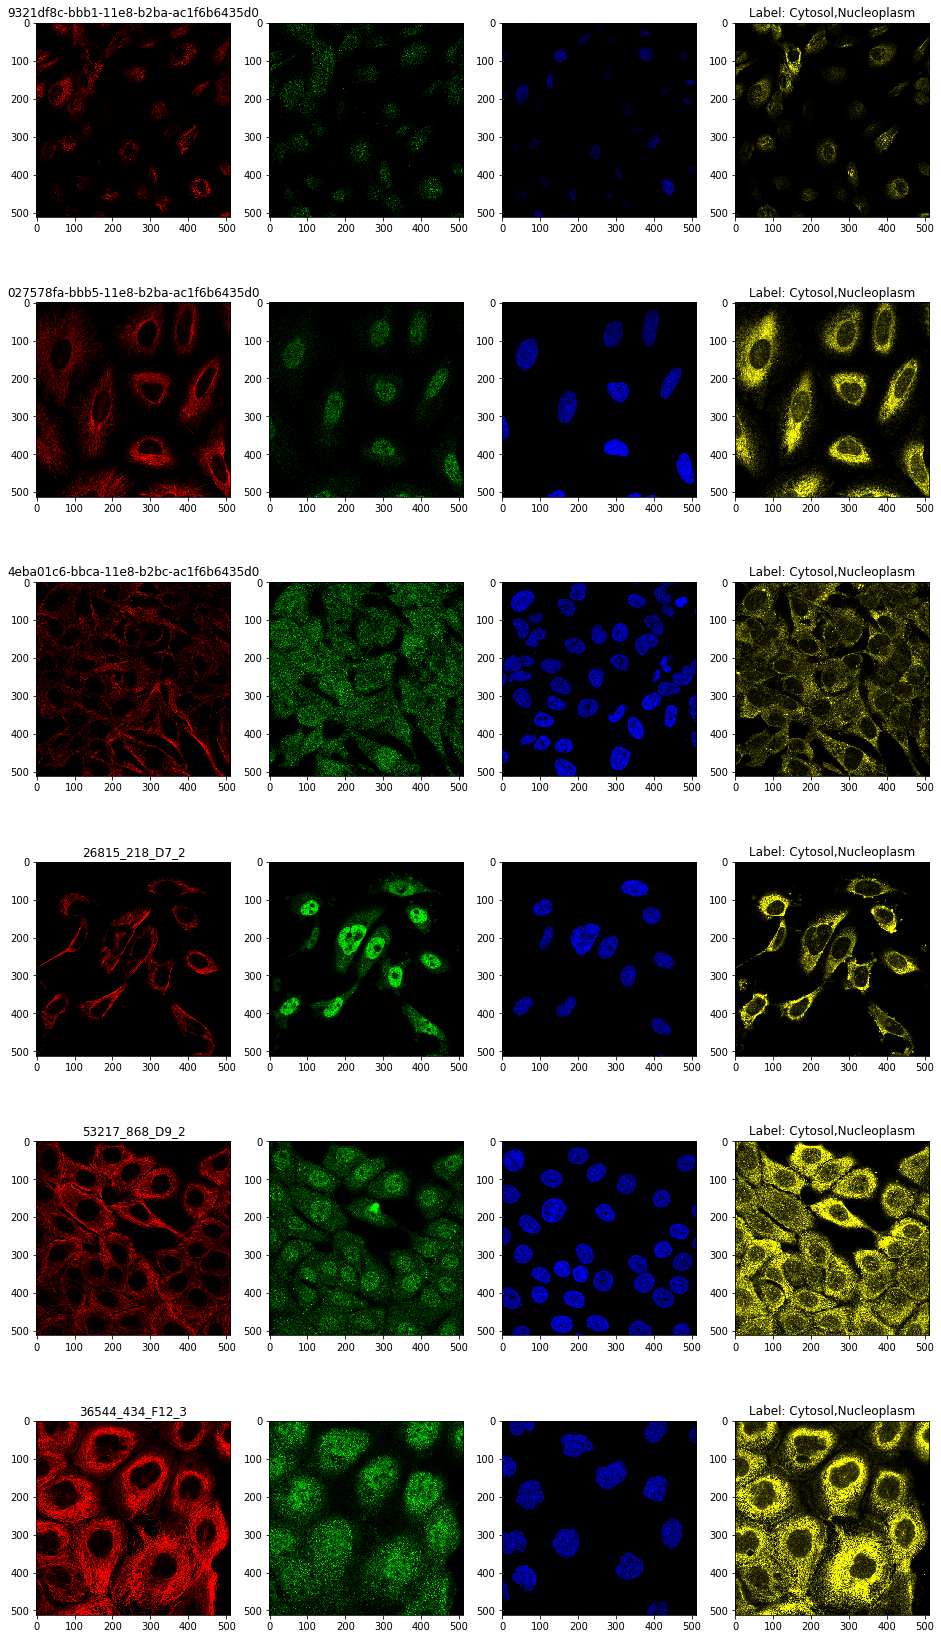

In [45]:
n_to_sample = 3
_, ax = plt.subplots(n_to_sample * 2,  4, figsize=(16, n_to_sample * 2 * 5))
axs = ax.flatten()
for i, image_id in enumerate(random.sample(list(kaggle_image_with_same_label), n_to_sample) + random.sample(list(hpaV18_image_with_same_label), n_to_sample)):
    image_path = [p for p in kaggle_image_paths + hpaV18_image_paths if p.stem == image_id][0]
    axs[i * 4 + 0].set_title(image_id)
    axs[i * 4 + 0].imshow(open_numpy(image_path, with_image_wrapper=False)['image'][:,:,0], cmap='reds')
    axs[i * 4 + 1].imshow(open_numpy(image_path, with_image_wrapper=False)['image'][:,:,1], cmap='greens')
    axs[i * 4 + 2].imshow(open_numpy(image_path, with_image_wrapper=False)['image'][:,:,2], cmap='blues')
    axs[i * 4 + 3].set_title(f"Label: {','.join(labels_name)}")
    axs[i * 4 + 3].imshow(open_numpy(image_path, with_image_wrapper=False)['image'][:,:,3], cmap='yellows')

#### Some helper functions to plot some images

In [14]:
from src.image import get_image_with_id, get_image_from_class, plot_rgby

In [15]:
plot_rgby(get_image_with_id('40755_840_C12_2'))

In [20]:
get_image_from_class(class_labels=[1, 2, 3, 4, 5, 6], n_samples=1)[0]

ValueError: No images found for ['Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center', 'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum']

In [21]:
plot_rgby(get_image_from_class(class_labels=[1, 2, 5], n_samples=1)[0])